In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge


data=pd.read_csv("/content/Housing(1).csv")
data.head(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [104]:
x=data.drop(data.columns[2],axis=1)
y=data["price"]

<Axes: >

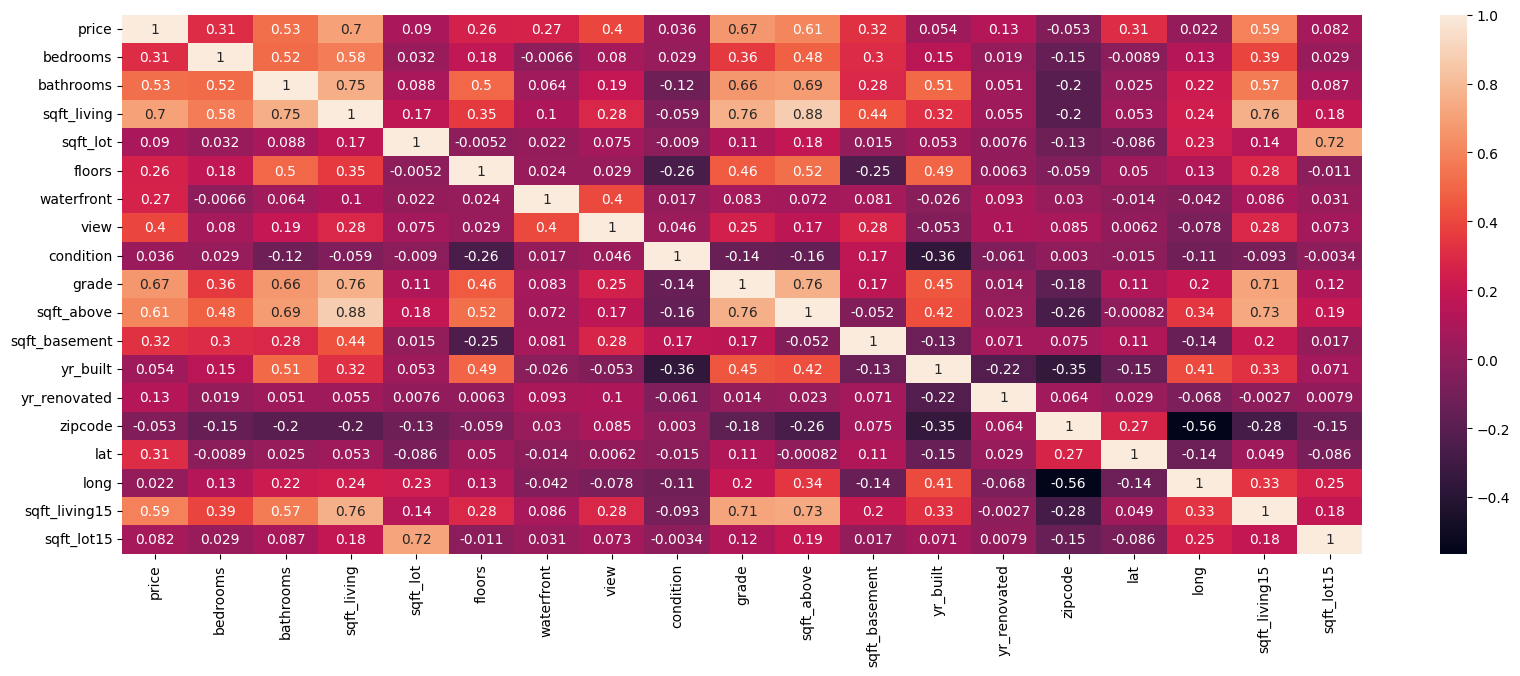

In [109]:
plt.figure(figsize=(20,7))
data_numeric = data.drop(['date', 'id'], axis=1)
sns.heatmap(data_numeric.corr(), annot=True)

In [117]:
if 'id' in x.columns:
    x = x.drop('id', axis=1)
if 'date' in x.columns:
    x = x.drop('date', axis=1)

sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [125]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

69.49309887966135

In [143]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

36280109242.413864
122188.07044255736
190473.38197872654


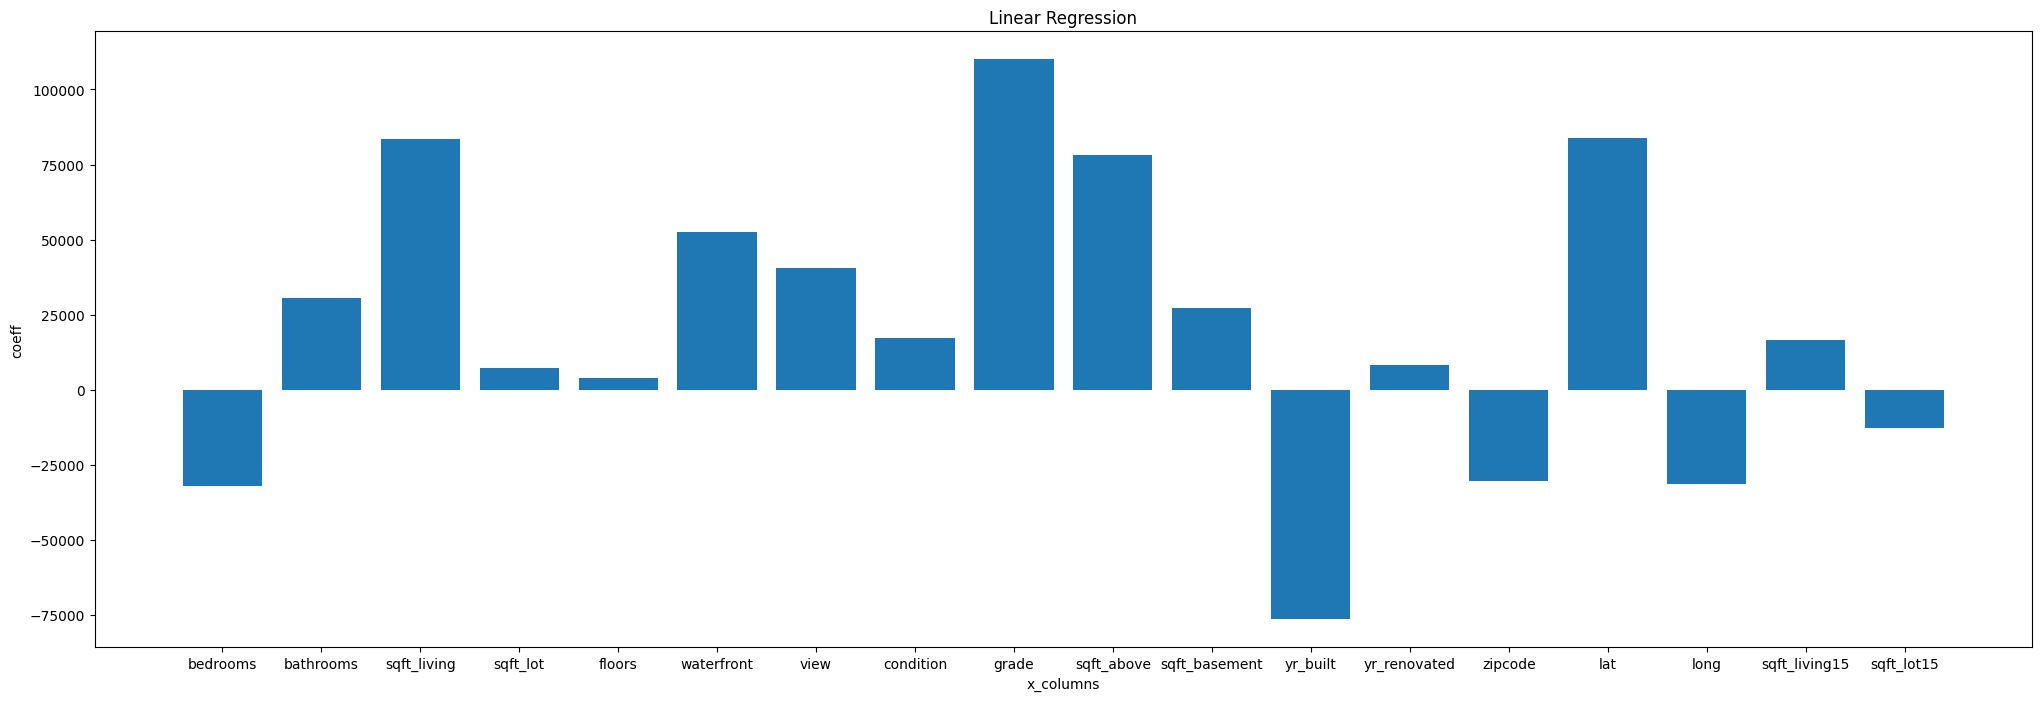

In [123]:
plt.figure(figsize=(25,8))
plt.bar(x.columns,lr.coef_)
plt.title("Linear Regression")
plt.xlabel("x_columns")
plt.ylabel("coeff")
plt.show()

In [126]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.261e+13, tolerance: 2.398e+11
  model = cd_fast.enet_coordinate_descent(


69.49329081514011

In [144]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

36279880984.54824
122187.23502604269
190472.78279205205


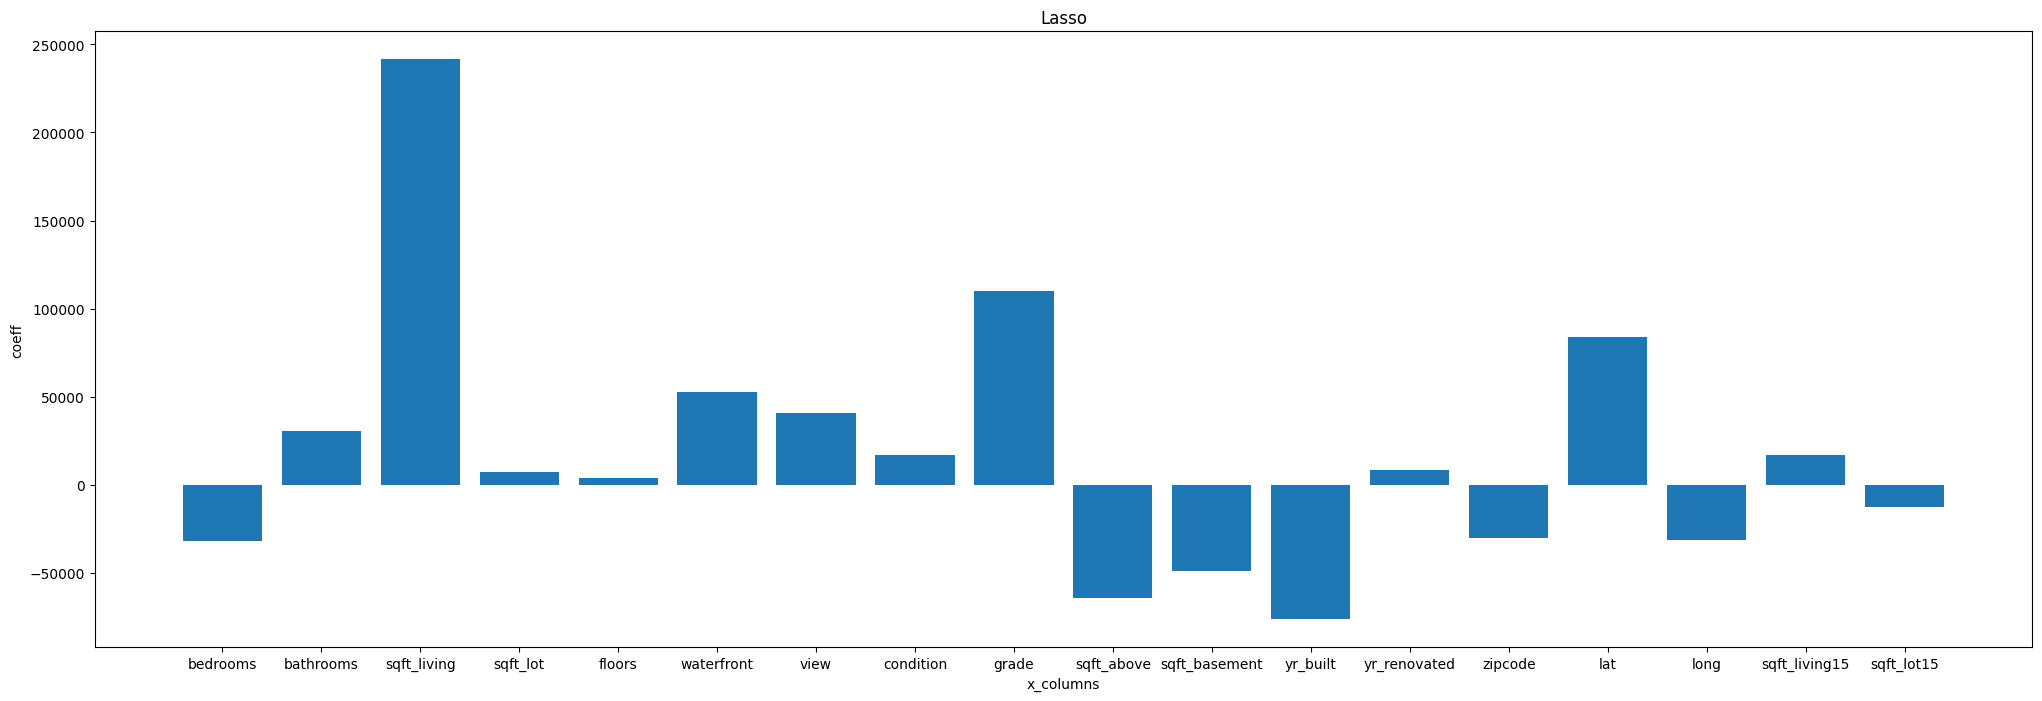

In [149]:
plt.figure(figsize=(25,8))
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("x_columns")
plt.ylabel("coeff")
plt.show()

In [133]:
ri=Ridge()
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

69.49314452496517

In [145]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

36280054959.06982
122186.01201825793
190473.23948279404


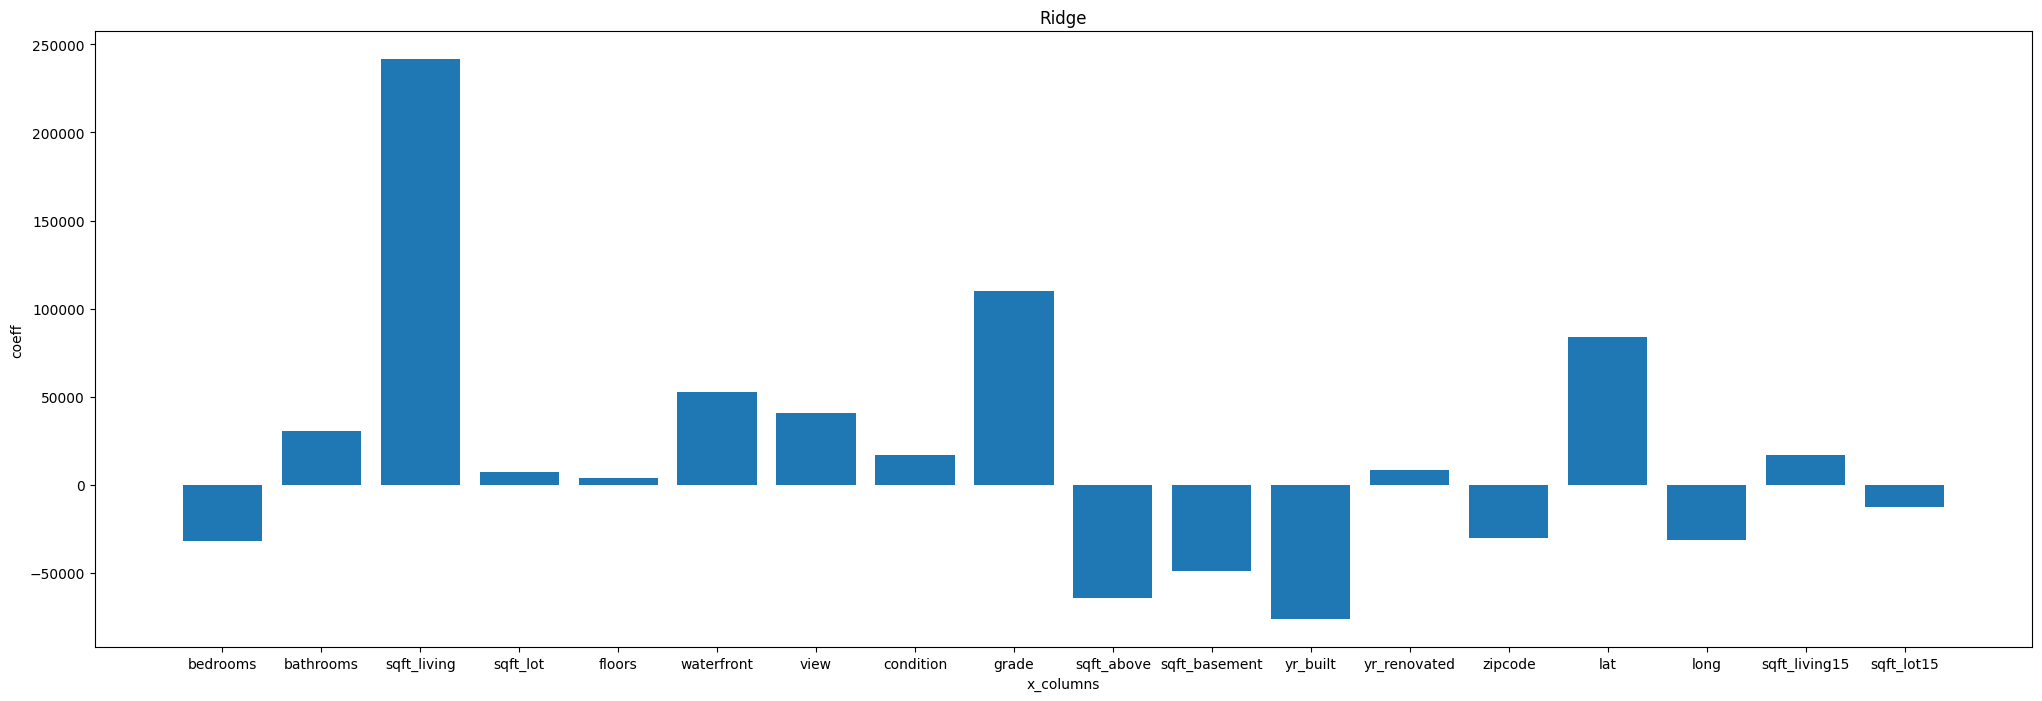

In [150]:
plt.figure(figsize=(25,8))
plt.bar(x.columns,la.coef_)
plt.title("Ridge")
plt.xlabel("x_columns")
plt.ylabel("coeff")
plt.show()

In [148]:
rough=pd.DataFrame({"col_names":x.columns,"Linear Regression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
rough

,col_names,Linear Regression,Lasso,Ridge
0,bedrooms,-32249.810468,-32238.480458,-32243.239672
1,bathrooms,30369.633384,30304.179578,30368.854482
2,sqft_living,83577.689674,241468.588891,83572.390416
3,sqft_lot,7285.447682,7252.099336,7284.504244
4,floors,4010.836578,4008.456684,4012.718815
5,waterfront,52393.575981,52386.759669,52391.577796
6,view,40412.607995,40413.012781,40412.819460
7,condition,17030.263501,17019.302776,17031.855734
8,grade,110006.816301,110032.347672,109995.027074
9,sqft_above,78165.965124,-64126.561188,78160.027740
